# Titanic Dataset Analysis

This notebook contains a comprehensive analysis of the Titanic dataset, exploring various factors that influenced passenger survival during the tragic event. The analysis includes data preprocessing, feature engineering, and predictive modeling to understand the patterns in survival rates.

## Dataset Overview

The Titanic dataset contains information about passengers aboard the RMS Titanic, including their demographics, ticket information, and survival status. The dataset is split into training (891 passengers) and test (418 passengers) sets, with the following key features:

- **PassengerId**: Unique identifier for each passenger
- **Survived**: Binary indicator (0 = No, 1 = Yes)
- **Pclass**: Passenger class (1 = First, 2 = Second, 3 = Third)
- **Name**: Passenger's full name
- **Sex**: Gender of the passenger
- **Age**: Age in years
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [11]:
!pip install kaggle --quiet

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json




Saving kaggle.json to kaggle.json


In [12]:
!mkdir -p ~/.kaggle
!mv "kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

## Data Loading and Initial Exploration

In this section, we:
1. Download the dataset from Kaggle
2. Load the training and test datasets
3. Examine the basic structure of the data
4. View the first few rows to understand the data format

The initial exploration helps us understand:
- The size of our datasets (891 training samples, 418 test samples)
- The types of features available
- The format of the data
- Any immediate data quality issues

In [13]:
!kaggle competitions download -c titanic

!unzip -q titanic.zip

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [14]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(f"Train shape: {train.shape}, Test shape: {test.shape}")
train.head()


Train shape: (891, 12), Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Quality Assessment

Our initial data quality assessment reveals:

### Missing Values
- **Age**: 177 missing values (19.9% of the dataset)
- **Cabin**: 687 missing values (77.1% of the dataset)
- **Embarked**: 2 missing values (0.2% of the dataset)

### Data Types
- **Numerical Features**:
  - PassengerId (int64)
  - Survived (int64)
  - Pclass (int64)
  - Age (float64)
  - SibSp (int64)
  - Parch (int64)
  - Fare (float64)

- **Categorical Features**:
  - Name (object)
  - Sex (object)
  - Ticket (object)
  - Cabin (object)
  - Embarked (object)

### Summary Statistics
- Overall survival rate: 38.4%
- Average age: 29.7 years
- Most common embarkation port: Southampton (S)
- Most common passenger class: Third class (3)

In [15]:
train.info()
print("\nMissing values:\n", train.isnull().sum())

train.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## Data Preprocessing

In this section, we perform several preprocessing steps to prepare our data for analysis:

### 1. Handling Missing Values
- **Age**: Filled missing values using median age by title
- **Embarked**: Filled 2 missing values with the most common port (S)
- **Cabin**: Due to high percentage of missing values (77.1%), this feature will be dropped

### 2. Feature Engineering
- Created 'Title' feature from passenger names
- Consolidated rare titles into a single category
- Standardized titles (Mlle → Miss, Ms → Miss, Mme → Mrs)

### 3. Data Transformation
- Converted categorical variables to numerical using one-hot encoding
- Aligned features between training and test sets

In [16]:
train['Title'] = train.Name.str.extract(r',\s*([^\.]+)\.')
median_ages = train.groupby('Title')['Age'].median()

train['Age'] = train.apply(
    lambda row: median_ages[row.Title] if pd.isnull(row.Age) else row.Age,
    axis=1
)


print("\nMissing values:\n", train.isnull().sum())

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# train_clean = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
# test_clean  = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)




Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


<ipython-input-16-c8a31c6bc629>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
<ipython-input-16-c8a31c6bc629>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [20]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title']
test['Title'] = test['Title']

# train_clean
# test_clean
train
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [21]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

for df in [train, test]:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare') # this will convert first all title into Rare
    df['Title'] = df['Title'].replace('Mlle', 'Miss') # this will convert Mlle title into Miss
    df['Title'] = df['Title'].replace('Ms', 'Miss') # this will convert Ms title into Miss
    df['Title'] = df['Title'].replace('Mme', 'Mrs') # this will convert Mme title into Mrs


## Feature Engineering and Encoding

In this section, we perform advanced feature engineering to improve our model's predictive power:

### 1. Title Extraction and Standardization
- Extracted titles from passenger names
- Consolidated rare titles (Lady, Countess, Capt, etc.) into a 'Rare' category
- Standardized variations of common titles:
  - Mlle → Miss
  - Ms → Miss
  - Mme → Mrs

### 2. Categorical Variable Encoding
- Applied one-hot encoding to:
  - Sex (male/female)
  - Embarked (C/Q/S)
  - Title (Mr/Mrs/Miss/Rare)
- Dropped first category to avoid multicollinearity
- Ensured consistent feature set between training and test data

The resulting dataset now contains binary indicators for categorical variables, making it suitable for machine learning algorithms.

In [44]:
# One-hot: Sex, Embarked, Title
train_clean = pd.get_dummies(train, columns=['Sex','Embarked','Title'], drop_first=True) # get_dummies create separeate columns for each category using false and true
test_clean  = pd.get_dummies(test,  columns=['Sex','Embarked','Title'], drop_first=True)

# Align columns
train_clean, test_clean = train_clean.align(test_clean, join='left', axis=1, fill_value=0)
train_clean


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True,False,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True,True,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.0,1,2,W./C. 6607,23.4500,NaN,False,False,True,True,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False,False,True,False,False


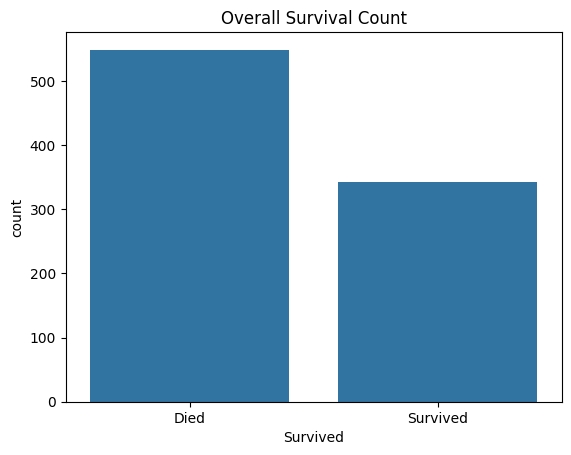

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train);
plt.title("Overall Survival Count")

plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

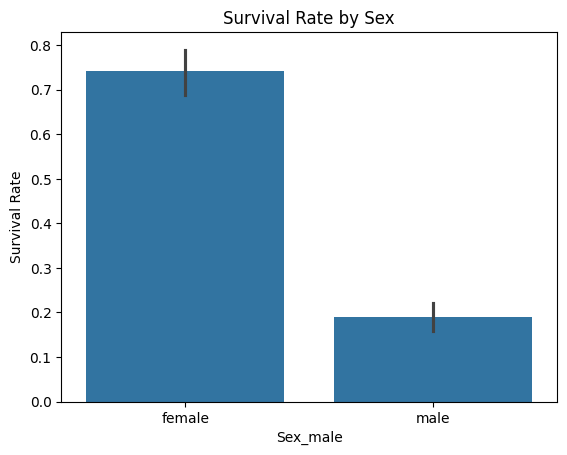

In [34]:
sns.barplot(x='Sex_male', y='Survived', data=train_clean);
plt.xticks([0,1], ['female','male'])
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Sex")
plt.show()


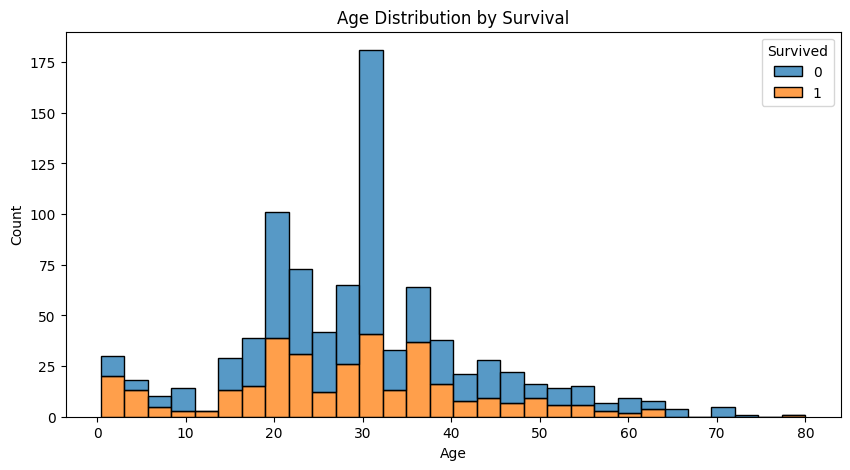

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=False, multiple='stack');
plt.title("Age Distribution by Survival")
plt.show()


In [48]:
# train_clean = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
# test_clean  = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

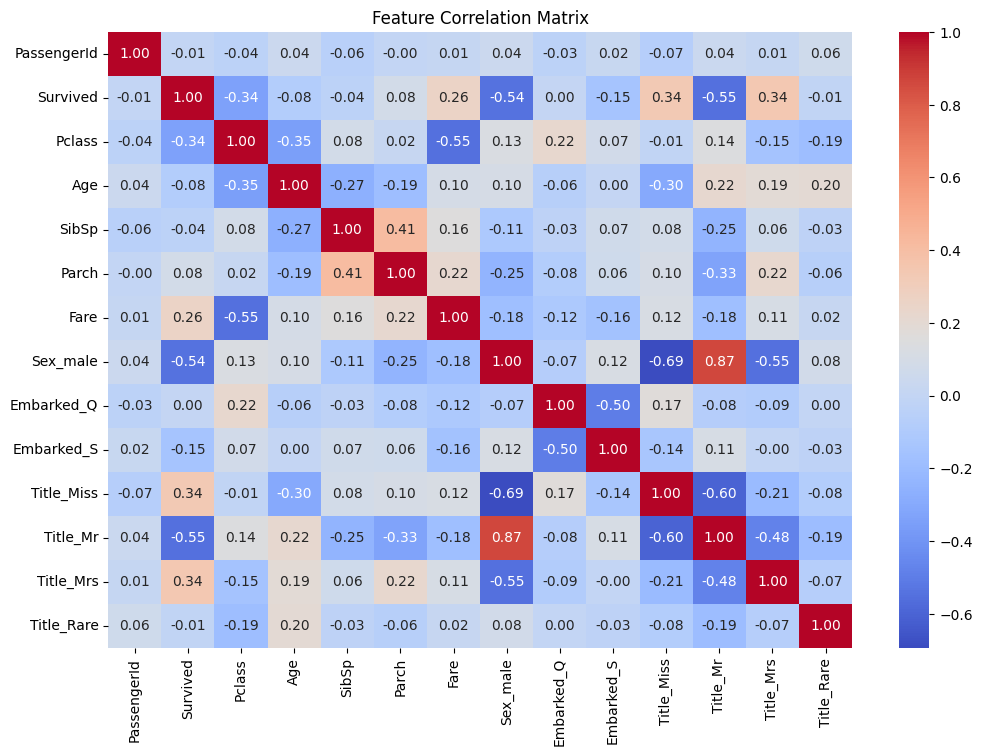

In [47]:
plt.figure(figsize=(12,8))

numeric_data = train_clean.drop(['Name', 'Ticket', 'Cabin'], axis=1)

corr = numeric_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
